# 테크닉 51 : 물류 데이터를 불러오자

In [1]:
import pandas as pd
from pandasql import sqldf

df_of_factory = pd.read_csv("./pyda100-master/Chapter_6/tbl_factory.csv", index_col = 0)
df_of_warehouse = pd.read_csv("./pyda100-master/Chapter_6/tbl_warehouse.csv", index_col = 0)
df_of_cost = pd.read_csv("./pyda100-master/Chapter_6/rel_cost.csv", index_col = 0)
df_of_transaction = pd.read_csv("./pyda100-master/Chapter_6/tbl_transaction.csv", index_col = 0)

print("* df_of_factory :")
display(df_of_factory)
print("* df_of_warehouse :")
display(df_of_warehouse)
print("* df_of_cost :")
display(df_of_cost)
print("* df_of_transaction :")
display(df_of_transaction)

* df_of_factory :


,FCName,FCDemand,FCRegion
FCID,,,
FC00001,서울공장,28,북부
FC00002,수원공장,29,북부
FC00003,인천공장,31,북부
FC00004,대전공장,25,북부
FC00005,대구공장,21,남부
FC00006,광주공장,30,남부
FC00007,부산공장,25,남부
FC00008,울산공장,16,남부


* df_of_warehouse :


,WHName,WHSupply,WHRegion
WHID,,,
WH00001,판교창고,35,북부
WH00002,용인창고,41,북부
WH00003,수원창고,42,북부
WH00004,대전창고,60,남부
WH00005,대구창고,72,남부
WH00006,광주창고,65,남부


* df_of_cost :


,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8
6,FC00002,WH00003,1.6
7,FC00003,WH00001,1.2
8,FC00003,WH00002,1.3
9,FC00003,WH00003,1.5


* df_of_transaction :


,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30
...,...,...,...,...
3995,2019-12-31 11:27:51,FC00007,WH00006,29
3996,2019-12-31 17:10:21,FC00002,WH00003,35
3997,2019-12-31 19:35:07,FC00003,WH00001,36


In [10]:
df_of_joined = sqldf("""
                 
                     SELECT A.TransactionDate,
                            A.Quantity,
                            B.Cost,
                            A.ToFC,
                            C.FCName,
                            C.FCDemand,
                            C.FCRegion,
                            A.FromWH,
                            D.WHName,
                            D.WHSupply,
                            D.WHRegion
                     FROM df_of_transaction A
                     LEFT OUTER JOIN
                     df_of_cost B
                     ON A.ToFC = B.FCID
                        AND A.FromWH = B.WHID
                     LEFT OUTER JOIN
                     df_of_factory C
                     ON A.ToFC = C.FCID
                     LEFT OUTER JOIN
                     df_of_warehouse D
                     ON A.FromWH = D.WHID
                 
                 """)
print("* df_of_joined :")
display(df_of_joined)

df_of_north = sqldf("""
                   
                       SELECT *
                       FROM   df_of_joined
                       WHERE  WHRegion = '북부'
                   
                   """)
print("* df_of_north :")
display(df_of_north)

df_of_south = sqldf("""
                   
                       SELECT *
                       FROM   df_of_joined
                       WHERE  WHRegion = '남부'
                   
                   """)
print("* df_of_south :")
display(df_of_south)

* df_of_joined :


,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FCRegion,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,북부,WH00003,수원창고,42,북부
1,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,남부,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,남부,WH00004,대전창고,60,남부
3,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,북부,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,북부,WH00002,용인창고,41,북부
...,...,...,...,...,...,...,...,...,...,...,...
3995,2019-12-31 11:27:51,29,1.3,FC00007,부산공장,25,남부,WH00006,광주창고,65,남부
3996,2019-12-31 17:10:21,35,1.6,FC00002,수원공장,29,북부,WH00003,수원창고,42,북부
3997,2019-12-31 19:35:07,36,1.2,FC00003,인천공장,31,북부,WH00001,판교창고,35,북부
3998,2019-12-31 21:45:07,34,0.3,FC00005,대구공장,21,남부,WH00005,대구창고,72,남부


* df_of_north :


,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FCRegion,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,북부,WH00003,수원창고,42,북부
1,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,북부,WH00003,수원창고,42,북부
2,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,북부,WH00002,용인창고,41,북부
3,2019-01-01 09:09:30,12,1.5,FC00001,서울공장,28,북부,WH00003,수원창고,42,북부
4,2019-01-01 10:52:55,27,1.5,FC00003,인천공장,31,북부,WH00003,수원창고,42,북부
...,...,...,...,...,...,...,...,...,...,...,...
1995,2019-12-30 12:29:42,22,0.9,FC00002,수원공장,29,북부,WH00001,판교창고,35,북부
1996,2019-12-30 17:51:24,32,1.3,FC00003,인천공장,31,북부,WH00002,용인창고,41,북부
1997,2019-12-31 01:50:16,33,0.8,FC00001,서울공장,28,북부,WH00002,용인창고,41,북부
1998,2019-12-31 17:10:21,35,1.6,FC00002,수원공장,29,북부,WH00003,수원창고,42,북부


* df_of_south :


,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FCRegion,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,남부,WH00006,광주창고,65,남부
1,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,남부,WH00004,대전창고,60,남부
2,2019-01-01 08:56:09,31,0.3,FC00005,대구공장,21,남부,WH00005,대구창고,72,남부
3,2019-01-01 09:00:15,33,0.7,FC00006,광주공장,30,남부,WH00006,광주창고,65,남부
4,2019-01-01 14:12:51,21,0.7,FC00006,광주공장,30,남부,WH00006,광주창고,65,남부
...,...,...,...,...,...,...,...,...,...,...,...
1995,2019-12-31 03:35:04,20,0.7,FC00006,광주공장,30,남부,WH00006,광주창고,65,남부
1996,2019-12-31 07:05:56,11,0.8,FC00005,대구공장,21,남부,WH00004,대전창고,60,남부
1997,2019-12-31 11:27:51,29,1.3,FC00007,부산공장,25,남부,WH00006,광주창고,65,남부
1998,2019-12-31 21:45:07,34,0.3,FC00005,대구공장,21,남부,WH00005,대구창고,72,남부


# 테크닉 52 : 현재 운송량과 비용을 확인해 보자

In [19]:
# 각 지사의 비용합계 계산

print("북부지사 총비용 :", str(df_of_north["Cost"].sum()) + "만원")
print("남부지사 총비용 :", str(df_of_south["Cost"].sum()) + "만원", "\n")

# 각 지사의 운송개수 계산

print("북부지사의 총부품 운송개수 :", str(df_of_north["Quantity"].sum()) + "개")
print("남부지사의 총부품 운송개수 :", str(df_of_south["Quantity"].sum()) + "개", "\n")

# 각 지사의 부품 1개당 운송비용

price = (df_of_north["Cost"].sum() / df_of_north["Quantity"].sum()) * 10000
print("북부지사의 부품 1개당 운송비용 :", str(int(price)) + "원")
price = (df_of_south["Cost"].sum() / df_of_south["Quantity"].sum()) * 10000
print("남부지사의 부품 1개당 운송비용 :", str(int(price)) + "원", "\n")

# 각 지사별 평균 운송비용

df_of_cost_joined_with_factory = sqldf("""

                                            SELECT A.*,
                                                   B.FCRegion
                                            FROM   df_of_cost A
                                            LEFT OUTER JOIN df_of_factory B
                                            ON     A.FCID = B.FCID
                                            
                                      """)

mean_cost_of_north = sqldf("""
                           
                               SELECT AVG(Cost) AS mean_cost
                               FROM   df_of_cost_joined_with_factory
                               WHERE  FCRegion = '북부'
                           
                           """)["mean_cost"][0]
print("북부지사의 평균 운송비용 :", str(mean_cost_of_north) + "만원")

mean_cost_of_south = sqldf("""
                           
                               SELECT AVG(Cost) AS mean_cost
                               FROM   df_of_cost_joined_with_factory
                               WHERE  FCRegion = '남부'
                           
                           """)["mean_cost"][0]
print("남부지사의 평균 운송비용 :", str(mean_cost_of_south) + "만원", "\n")

print("* 남부지사가 효율 높게 부품을 운송하고 있다는 것을 알 수 있음")

북부지사 총비용 : 2189.3만원
남부지사 총비용 : 2062.0만원 

북부지사의 총부품 운송개수 : 49146개
남부지사의 총부품 운송개수 : 50214개 

북부지사의 부품 1개당 운송비용 : 445원
남부지사의 부품 1개당 운송비용 : 410원 

북부지사의 평균 운송비용 : 1.075만원
남부지사의 평균 운송비용 : 1.05만원 

* 남부지사가 효율 높게 부품을 운송하고 있다는 것을 알 수 있음


# 테크닉 55 : 경로에 가중치를 부여하자(테크닉 53, 54 내용도 포함됨)

* df_of_weight :


,A,B,C,D,E
0,0.639921,0.143353,0.944669,0.521848,0.000000
1,0.264556,0.000000,0.456150,0.568434,0.000000
2,0.617635,0.612096,0.616934,0.943748,0.000000
3,0.000000,0.000000,0.697631,0.060225,0.666767
4,0.670638,0.210383,0.000000,0.315428,0.000000


* df_of_position :


,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


* list_of_edge : 

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'D'), ('C', 'E'), ('D', 'E')] 

* list_of_weights : 

[1.4335300000000002, 9.44669, 5.21848, 0.0, 4.5615, 5.68434, 0.0, 9.43748, 0.0, 6.66767] 



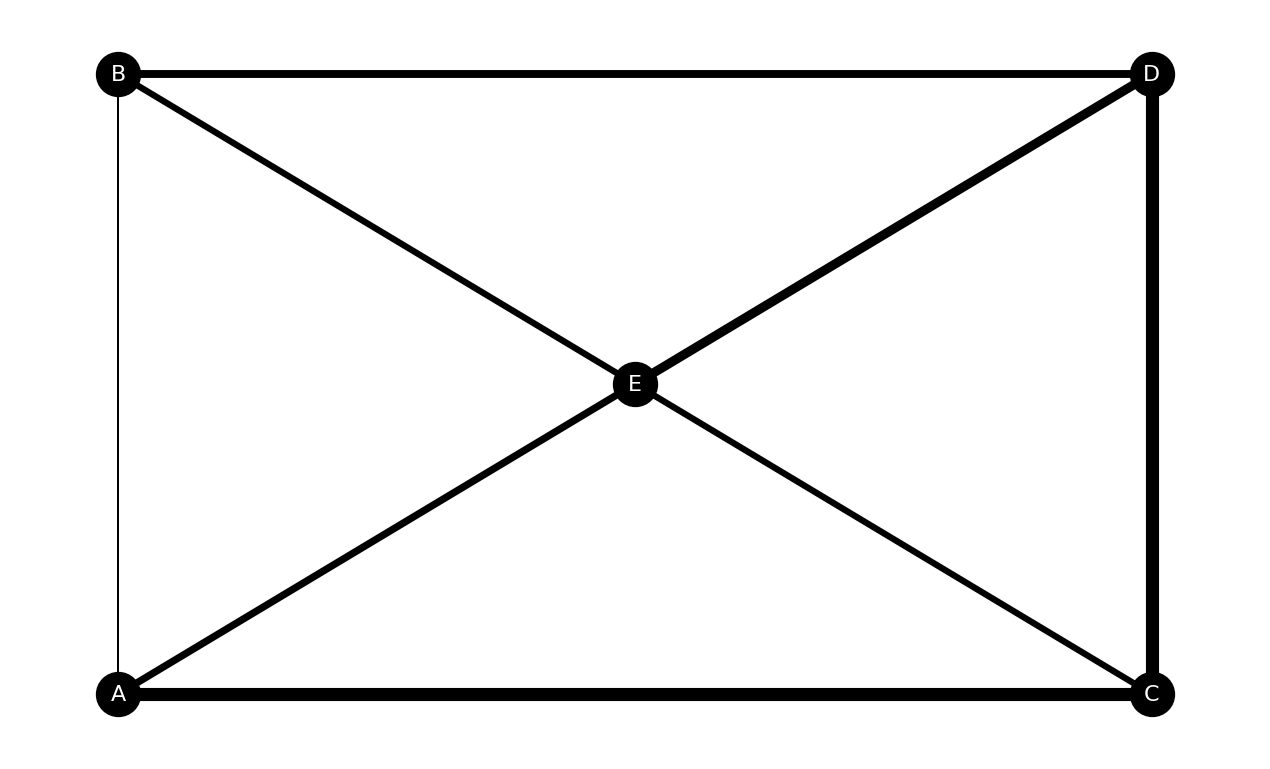

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

df_of_weight = pd.read_csv("./pyda100-master/Chapter_6/network_weight.csv")
df_of_position = pd.read_csv("./pyda100-master/Chapter_6/network_pos.csv")

print("* df_of_weight :")
display(df_of_weight)
print("* df_of_position :")
display(df_of_position)

# 그래프 객체 생성

G = nx.Graph()

# 노드 설정

for i in range(len(df_of_weight.columns)) : 
    
    G.add_node(df_of_weight.columns[i])

# 노드 좌표 설정

pos = {}
for i in range(len(df_of_weight.columns)) : 
    
    node = df_of_weight.columns[i]
    pos[node] = (df_of_position[node][0], df_of_position[node][1])

# 엣지 설정

list_of_edge = []
for i in range(len(df_of_weight)) :                     # 이미 추가된 엣지를 중복으로 추가히지 않고, 자기자신에 대한 엣지를 추가하지 않음

    for j in range(i + 1, len(df_of_weight.columns)) :       

            list_of_edge.append((df_of_weight.columns[i], df_of_weight.columns[j]))
            G.add_edge(df_of_weight.columns[i], df_of_weight.columns[j])

print("* list_of_edge :", "\n")
print(list_of_edge, "\n")

# 엣지 가중치 리스트화

size = 10
list_of_weights = []
for i in range(len(df_of_weight)) :                     # 이미 추가된 엣지를 중복으로 추가히지 않고, 자기자신에 대한 엣지를 추가하지 않음

    for j in range(i + 1, len(df_of_weight.columns)) :

            list_of_weights.append(df_of_weight.iloc[i][j] * size)

print("* list_of_weights :", "\n")
print(list_of_weights, "\n")


            
# 생성된 그래프 그리기

plt.figure(figsize = (12.5, 7.5))
nx.draw(G, pos, with_labels = True, font_size = 16, node_size = 1000, node_color = 'k', font_color = 'w', width = list_of_weights)
plt.show()

# 테크닉 57 : 운송 경로 정보로 네트워크를 가시화해 보자(테크닉 56 내용도 포함)

* df_of_trans_route :


,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


* df_of_pos :


,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


* edge_weights : [1.5, 1.5, 0.0, 0.5, 0.5, 0.0, 3.0, 0.5, 1.0, 1.5, 0.2, 1.5] 



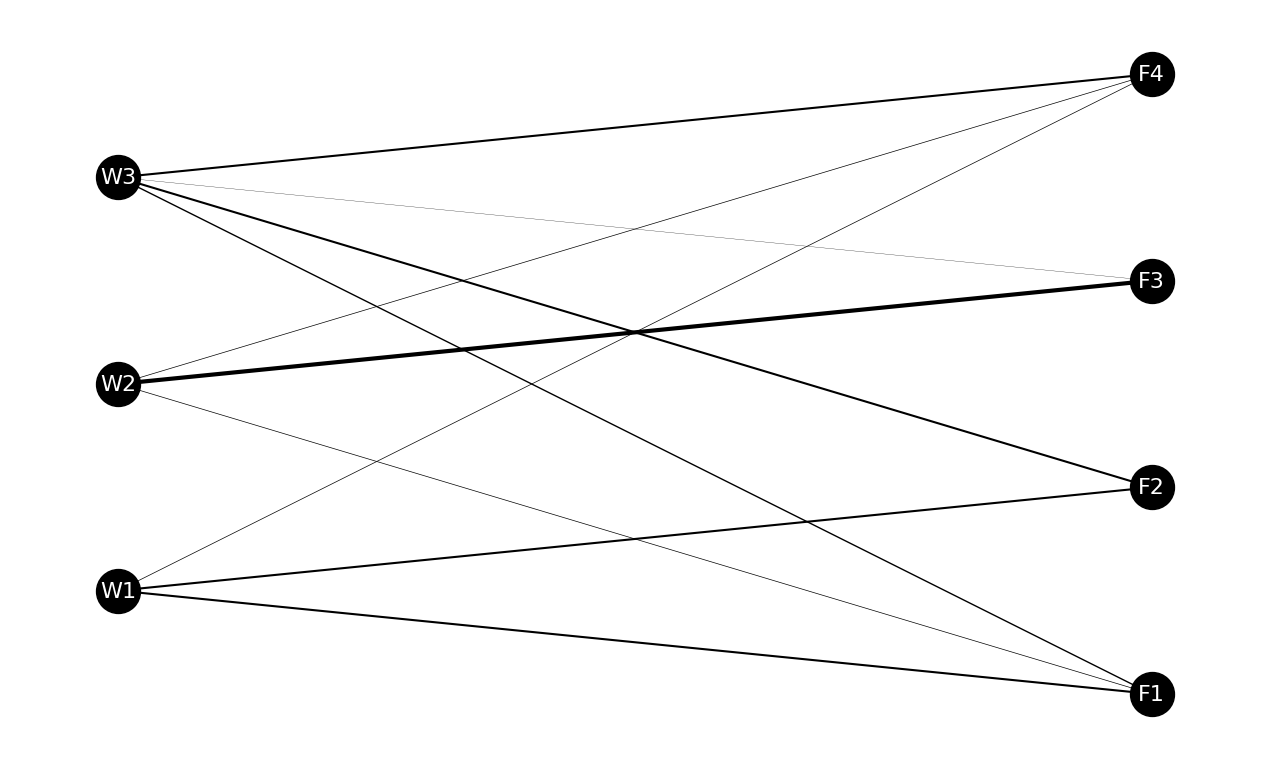

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

df_of_trans_route = pd.read_csv("./pyda100-master/Chapter_6/trans_route.csv", index_col = '공장') # trans_route.csv : 어느 창고에서 어느 공장으로, 어느 정도의 양을 운송했는지 기록한 파일
print("* df_of_trans_route :")
display(df_of_trans_route)

df_of_pos = pd.read_csv("./pyda100-master/Chapter_6/trans_route_pos.csv")
print("* df_of_pos :")
display(df_of_pos)

# 그래프 객체 생성

G = nx.Graph()

# 노드 설정

for i in range(len(df_of_pos.columns)) :

    G.add_node(df_of_pos.columns[i])

# 엣지 설정

for index_of_warehouse in df_of_trans_route.index :

    for index_of_factory in df_of_trans_route.columns :

        G.add_edge(index_of_warehouse, index_of_factory)

# 엣지 가중치 리스트화

edge_weights = []
for index_of_row in range(len(df_of_trans_route.index)) :

    for index_of_column in range(len(df_of_trans_route.columns)) :

        edge_weights.append(df_of_trans_route.iloc[index_of_row, [index_of_column]][0] * 0.1)

print("* edge_weights :", edge_weights, "\n")

# 노드 좌표 설정

pos = {}
for index_of_node in range(len(df_of_pos.columns)) :

    node = df_of_pos.columns[index_of_node]
    pos[node] = (df_of_pos[node][0], df_of_pos[node][1])

# 그래프 그리기

plt.figure(figsize = (12.5, 7.5))
nx.draw(G, pos, with_labels = True, font_size = 16, node_size = 1000, node_color = 'k', font_color = 'w', width = edge_weights)
plt.show()

# 테크닉 58 : 운송 비용 함수를 작성하자

In [6]:
import pandas as pd

df_of_trans_route = pd.read_csv("./pyda100-master/Chapter_6/trans_route.csv", index_col = '공장') # trans_route.csv : 어느 창고에서 어느 공장으로, 어느 정도의 양을 운송했는지 기록한 파일
print("* df_of_trans_route :")
display(df_of_trans_route)

df_of_trans_cost  = pd.read_csv("./pyda100-master/Chapter_6/trans_cost.csv", index_col = '공장')
print("* df_of_trans_cost :")
display(df_of_trans_cost)

# 운송 비용 함수 정의

def trans_cost(df_of_trans_route : pd.DataFrame, df_of_trans_cost : pd.DataFrame) -> int :

    cost = 0
    for index_of_warehouse in range(len(df_of_trans_route.index)) :

        for index_of_factory in range(len(df_of_trans_cost.columns)) :

            cost = cost + (df_of_trans_route.iloc[index_of_warehouse, [index_of_factory]][0] * df_of_trans_cost.iloc[index_of_warehouse, [index_of_factory]][0])
    
    return cost

print("* 총 운송 비용 :", trans_cost(df_of_trans_route, df_of_trans_cost))

* df_of_trans_route :


,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


* df_of_trans_cost :


,F1,F2,F3,F4
공장,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


* 총 운송 비용 : 1493


# 테크닉 59 : 제약 조건을 만들어보자

In [27]:
import pandas as pd
from pandasql import sqldf

df_of_trans_route = pd.read_csv("./pyda100-master/Chapter_6/trans_route.csv", index_col = '공장') # trans_route.csv : 어느 창고에서 어느 공장으로, 어느 정도의 양을 운송했는지 기록한 파일
print("* df_of_trans_route :")
display(df_of_trans_route)

df_of_demand_of_factory = pd.read_csv("./pyda100-master/Chapter_6/demand.csv")
print("* df_of_demand_of_factory :")
display(df_of_demand_of_factory)

df_of_supply_of_warehouse = pd.read_csv("./pyda100-master/Chapter_6/supply.csv")
print("* df_of_supply_of_warehouse :")
display(df_of_supply_of_warehouse)

# 수요측(공장) 제약 조건 만족 여부 확인

print("!!! 수요측(공장) 제약 조건 만족 여부 확인 !!!", "\n")
for factory in df_of_trans_route.columns :

    product_count_in_factory = sqldf("""
                                    
                                        SELECT SUM({})
                                        FROM   df_of_trans_route

                                    """.format(factory)).iloc[0, [0]][0]                                    
    condition_of_factory     =  df_of_demand_of_factory[factory][0]
    print("* {}으로 운송량 :".format(factory), product_count_in_factory, "(수요량 : {})".format(condition_of_factory))
    if product_count_in_factory >= condition_of_factory :

        print("수요량을 만족시키고 있음", "\n")

    else :

        print("수요량을 만족시키지 못하고 있음. 운송경로 재계산 필요", "\n")

print("!!! 공급측(창고) 제약 조건 만족 여부 확인 !!!", "\n")
for warehouse in df_of_trans_route.index :

    product_count_in_warehouse = sqldf("""
                                    
                                            SELECT F1 + F2 + F3 + F4
                                            FROM   df_of_trans_route
                                            WHERE  공장 = '{}'

                                        """.format(warehouse)).iloc[0, [0]][0]
    condition_of_warehouse     = df_of_supply_of_warehouse[warehouse][0]
    print("* {}부터의 운송량 :".format(warehouse), product_count_in_warehouse, "(공급한계 : {})".format(condition_of_warehouse))
    if product_count_in_warehouse <= condition_of_warehouse :

        print("공급한계 범위내", "\n")

    else :

        print("공급한계 초과. 운송경로 재계산 필요", "\n")                        

* df_of_trans_route :


,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


* df_of_demand_of_factory :


,F1,F2,F3,F4
0,28,29,31,25


* df_of_supply_of_warehouse :


,W1,W2,W3
0,35,41,42


!!! 수요측(공장) 제약 조건 만족 여부 확인 !!! 

* F1으로 운송량 : 30 (수요량 : 28)
수요량을 만족시키고 있음 

* F2으로 운송량 : 30 (수요량 : 29)
수요량을 만족시키고 있음 

* F3으로 운송량 : 32 (수요량 : 31)
수요량을 만족시키고 있음 

* F4으로 운송량 : 25 (수요량 : 25)
수요량을 만족시키고 있음 

!!! 공급측(창고) 제약 조건 만족 여부 확인 !!! 

* W1부터의 운송량 : 35 (공급한계 : 35)
공급한계 범위내 

* W2부터의 운송량 : 40 (공급한계 : 41)
공급한계 범위내 

* W3부터의 운송량 : 42 (공급한계 : 42)
공급한계 범위내 



# 테크닉 60 : 운송 경로를 변경해서 운송 비용 함수의 변화를 확인하자

In [31]:
# 운송 비용 함수 정의

def trans_cost(df_of_trans_route : pd.DataFrame, df_of_trans_cost : pd.DataFrame) -> int :

    cost = 0
    for index_of_warehouse in range(len(df_of_trans_route.index)) :

        for index_of_factory in range(len(df_of_trans_cost.columns)) :

            cost = cost + (df_of_trans_route.iloc[index_of_warehouse, [index_of_factory]][0] * df_of_trans_cost.iloc[index_of_warehouse, [index_of_factory]][0])
    
    return cost

# 수요측 제약 조건 계산 함수 정의

def get_condition_flag_of_demand(df_of_trans_route : pd.DataFrame, df_of_demand_of_factory : pd.DataFrame) -> list :

    list_of_flag = []
    for factory in df_of_trans_route.columns :

        product_count_in_factory = sqldf("""
                                        
                                            SELECT SUM({})
                                            FROM   df_of_trans_route

                                        """.format(factory)).iloc[0, [0]][0]                                    
        condition_of_factory     =  df_of_demand_of_factory[factory][0]
        if product_count_in_factory >= condition_of_factory :

            list_of_flag.append(1)

        else :

            list_of_flag.append(0)
    
    return list_of_flag

# 공급측 제약 조건 계산 함수 정의

def get_condition_flag_of_supply(df_of_trans_route : pd.DataFrame, df_of_supply_of_warehouse : pd.DataFrame) -> list :
    
    list_of_flag = []
    for warehouse in df_of_trans_route.index :

        product_count_in_warehouse = sqldf("""
                                        
                                                SELECT F1 + F2 + F3 + F4
                                                FROM   df_of_trans_route
                                                WHERE  공장 = '{}'

                                            """.format(warehouse)).iloc[0, [0]][0]
        condition_of_warehouse     = df_of_supply_of_warehouse[warehouse][0]
        if product_count_in_warehouse <= condition_of_warehouse :

            list_of_flag.append(1)

        else :

            list_of_flag.append(0)  

    return list_of_flag                         

# 변경된 운송 경로 데이터 불러오기

df_of_trans_route_new = pd.read_csv("./pyda100-master/Chapter_6/trans_route_new.csv", index_col = '공장') # trans_route.csv : 어느 창고에서 어느 공장으로, 어느 정도의 양을 운송했는지 기록한 파일
print("* df_of_trans_route_new :")
display(df_of_trans_route_new)

# 운송 비용 데이터 불러오기

df_of_trans_cost  = pd.read_csv("./pyda100-master/Chapter_6/trans_cost.csv", index_col = '공장')
print("* df_of_trans_cost :")
display(df_of_trans_cost)

# 변경된 운송 경로 기반의 총 운송 비용 계산하기

print("* 총 운송 비용 :", trans_cost(df_of_trans_route_new, df_of_trans_cost), "\n")

# 수요측 데이터 불러오기

df_of_demand_of_factory = pd.read_csv("./pyda100-master/Chapter_6/demand.csv")
print("* df_of_demand_of_factory :")
display(df_of_demand_of_factory)

# 공급측 데이터 불러오기

df_of_supply_of_warehouse = pd.read_csv("./pyda100-master/Chapter_6/supply.csv")
print("* df_of_supply_of_warehouse :")
display(df_of_supply_of_warehouse)

print("* 수요조건 만족 여부 :", get_condition_flag_of_demand(df_of_trans_route_new, df_of_demand_of_factory))
print("* 공급조건 만족 여부 :", get_condition_flag_of_supply(df_of_trans_route_new, df_of_supply_of_warehouse), "\n")

print("* 비용이 절감됐지만, 두 번째 공급 조건을 만족시키기 못함")


* df_of_trans_route_new :


,F1,F2,F3,F4
공장,,,,
W1,15,15,0,0
W2,5,0,30,10
W3,10,15,2,15


* df_of_trans_cost :


,F1,F2,F3,F4
공장,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


* 총 운송 비용 : 1428 

* df_of_demand_of_factory :


,F1,F2,F3,F4
0,28,29,31,25


* df_of_supply_of_warehouse :


,W1,W2,W3
0,35,41,42


* 수요조건 만족 여부 : [1, 1, 1, 1]
* 공급조건 만족 여부 : [1, 0, 1] 

* 비용이 절감됐지만, 두 번째 공급 조건을 만족시키기 못함
